## 利用 tensorflow 实现的卷积神经网络来进行 MNIST 手写数字图像的分类


In [31]:
import tensorflow.keras as keras
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os
import sys
import time
import tensorflow as tf

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.0
sys.version_info(major=3, minor=7, micro=11, releaselevel='final', serial=0)
matplotlib 3.4.2
numpy 1.18.5
pandas 1.3.3
sklearn 1.0
tensorflow 2.3.0
tensorflow.keras 2.4.0


### 1. 获取数据集

In [32]:
# 导入数据
import tensorflow.keras as keras

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 打印数据的shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### 2. 展示数据

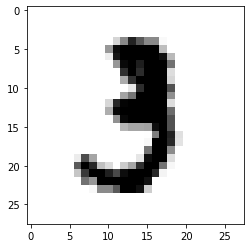

In [33]:
# 数据集都是向量数据, 直接输出无法显示图片, 需要借用matplotlib显示图片
def show_mnist(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()


# 展示图片
show_mnist(x_train[10])

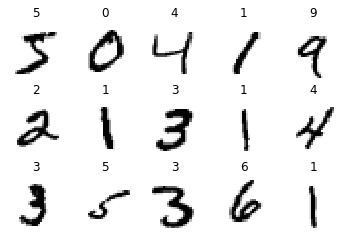

In [34]:
# 展示所有种类的数据

def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    # 断言, 判断输入数据是否合法
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)

    # 创建画板
    plt.plot(figsize=(n_cols * 1.4, n_rows * 1.6))
    # 展示不同种类的图像
    for row in range(n_rows):
        for col in range(n_cols):
            # 获取索引
            index = n_cols * row + col
            # 绘制子图
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap="binary",
                       interpolation="nearest")
            # 关闭坐标系
            plt.axis('off')
            # 设置标题
            plt.title(class_names[y_data[index]])


# 分类
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

show_imgs(3, 5, x_train, y_train, class_names)

### 3. 搭建模型

In [35]:
model = keras.models.Sequential()

# 添加卷积层
model.add(keras.layers.Conv2D(
    # filters : 输出的通道数(卷积核数量)
    # kernel_size : 卷积核的大小
    # padding : 要不要加上padding 让输入和输出一致
    filters=32, kernel_size=3, padding="same",
    input_shape=[28, 28, 1], activation="relu"
))
model.add(keras.layers.Conv2D(
    filters=32, kernel_size=3, padding="same",
    activation="relu"
))
# 池化操作
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(
    filters=64, kernel_size=3, padding="same",
    activation="relu"
))
model.add(keras.layers.Conv2D(
    filters=64, kernel_size=3, padding="same",
    activation="relu"
))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(
    filters=128, kernel_size=3, padding="same",
    activation="relu"
))
model.add(keras.layers.Conv2D(
    filters=128, kernel_size=3, padding="same",
    activation="relu"
))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
# 添加全连接层
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer="sgd", metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 128)        

### 4. 对数据进行正则化

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)

### 5. 训练模型

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 181s 121ms/step - loss: 0.3239 - accuracy: 0.9028 - val_loss: 0.0971 - val_accuracy: 0.9712
Epoch 2/10
1500/1500 [==============================] - 181s 120ms/step - loss: 0.0767 - accuracy: 0.9760 - val_loss: 0.0597 - val_accuracy: 0.9825
Epoch 3/10
1500/1500 [==============================] - 193s 129ms/step - loss: 0.0521 - accuracy: 0.9839 - val_loss: 0.0757 - val_accuracy: 0.9775
Epoch 4/10
  91/1500 [>.............................] - ETA: 2:54 - loss: 0.0421 - accuracy: 0.9845

In [ ]:
print(history.history)

### 6. 绘制图像

In [ ]:
def plot_metric(history):
    pd.DataFrame(history.history).plot(figsize=(8,6))
    plt.gca().set_ylim(0,1)
    plt.grid(True)
    plt.show()
plot_metric(history)

### 7. 在测试集上验证

In [ ]:
model.evaluate(x_test_scaled, y_train)